主成分分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

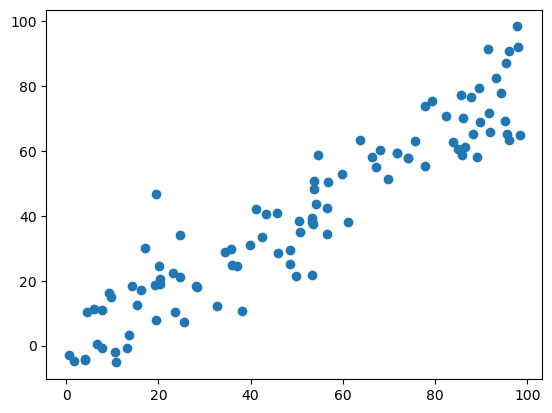

In [2]:
x = np.empty([100,2])
x[:,0] = np.random.uniform(0.,100.,size = 100)
x[:,1] = 0.75 * x[:,0] + 3. + np.random.normal(0,10.,size = 100)
plt.scatter(x[:,0],x[:,1])
plt.show

demean操作

In [3]:
def demean(x):
    return x - np.mean(x,axis = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

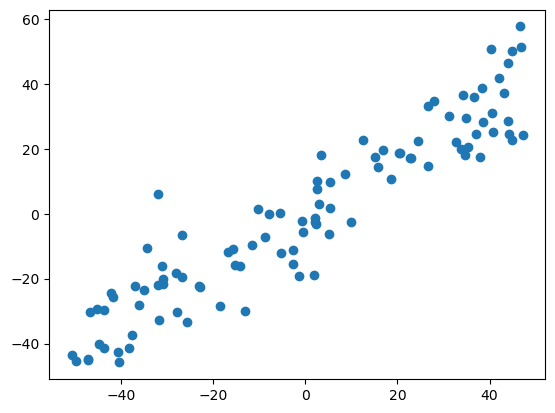

In [4]:
x_demean = demean(x)
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.show

In [5]:
np.mean(x_demean[:,0])

4.973799150320702e-16

In [6]:
np.mean(x_demean[:,1])

3.623767952376511e-15

In [7]:
#pca 效用函数
def f(w,x):
    return np.sum((x.dot(w) ** 2)) / len(x)

def df_math(w,x):
    return x.T.dot(x.dot(w)) * 2 / len(x)

def df_debug(w, x, epsilon = 0.01):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon 
        w_2 = w.copy()
        w_2[i] -= epsilon 
        res[i] = (f(w_1,x) - f(w_2,x)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, x, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,x)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,x) - f(last_w,x)) < epsilon):
            break
        cur_iter += 1
    return w


In [8]:
initial_w = np.random.random(x.shape[1])
initial_w

array([0.41082333, 0.4139244 ])

In [9]:
eta = 0.001

In [10]:
gradient_ascent(df_debug,x_demean,initial_w,eta)

array([0.75622107, 0.65431621])

In [11]:
w = gradient_ascent(df_math,x_demean,initial_w,eta)
w

array([0.75622107, 0.65431621])

<function matplotlib.pyplot.show(close=None, block=None)>

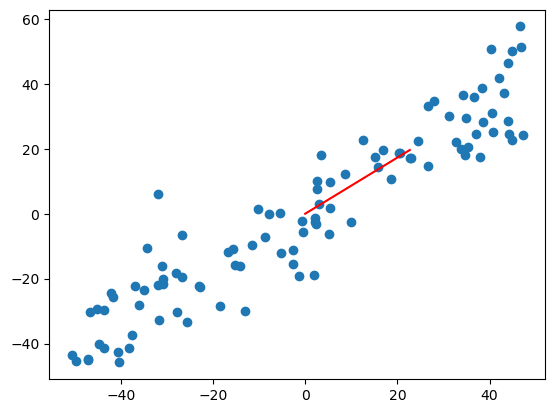

In [12]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0,w[0] * 30],[0,w[1] * 30],color='r')
plt.show

求第二主成分

In [13]:
#先去掉第一个主成分
x2 = x - x.dot(w).reshape(-1,1) * w
x2

array([[-4.07754487e+00,  4.71259199e+00],
       [-2.11210692e+00,  2.44105178e+00],
       [-3.21641575e+00,  3.71734846e+00],
       [ 3.15609894e-01, -3.64763775e-01],
       [ 3.46285444e+00, -4.00216813e+00],
       [-6.86301492e-01,  7.93187817e-01],
       [-5.60041891e+00,  6.47264228e+00],
       [ 7.98754647e+00, -9.23154711e+00],
       [ 5.16925670e-01, -5.97432978e-01],
       [-3.27196315e+00,  3.78154694e+00],
       [ 1.20634819e+01, -1.39422790e+01],
       [ 6.79877594e+00, -7.85763446e+00],
       [ 3.20526100e+00, -3.70445644e+00],
       [-7.54853256e+00,  8.72416006e+00],
       [ 4.92838588e+00, -5.69594513e+00],
       [ 3.03042530e+00, -3.50239138e+00],
       [-1.56054975e+00,  1.80359371e+00],
       [-6.02922447e+00,  6.96823109e+00],
       [ 3.79983677e+00, -4.39163294e+00],
       [-6.36528294e+00,  7.35662816e+00],
       [ 5.15848447e-01, -5.96187985e-01],
       [-2.99575676e+00,  3.46232348e+00],
       [-3.16197337e+00,  3.65442707e+00],
       [ 4.

<function matplotlib.pyplot.show(close=None, block=None)>

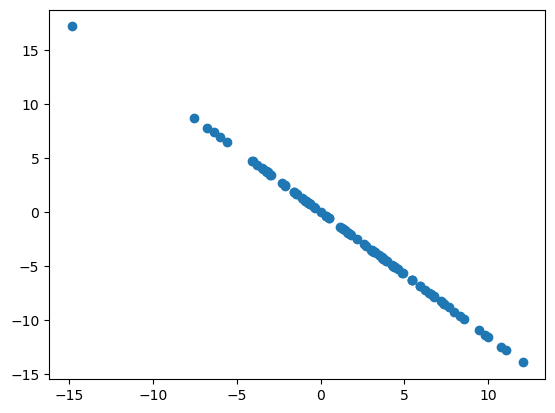

In [14]:
plt.scatter(x2[:,0],x2[:,1])
plt.show

In [15]:
w2 = gradient_ascent(df_math,x2,initial_w,eta)
w2

array([-0.65429673,  0.75623792])

In [16]:
w.dot(w2)

2.5754072310512342e-05

In [17]:
a = np.array([[1,2],[2,1]])
b = np.array([1,2])
a.dot(b)

array([5, 4])

In [18]:
x = np.empty([100,2])
x[:,0] = np.random.uniform(0.,100.,size = 100)
x[:,1] = 0.75 * x[:,0] + 3. + np.random.normal(0,10.,size = 100)
initial_w = np.random.random(x.shape[1])

In [19]:
# from PCA import PCA
# pca = PCA(n_components = 2)
# pca.fit(x)
# pca.components_

sklearn中的PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(x)
pca.components_

array([[0.7775713 , 0.62879478]])

In [21]:
#对数据进行降维
x_reduction = pca.transform(x)
x_reduction

array([[ 57.27487612],
       [-26.04137481],
       [ 51.16443516],
       [-64.26928492],
       [ 15.43102179],
       [ 45.41151533],
       [ 27.02965089],
       [-52.6840209 ],
       [ 47.85237003],
       [ -7.58578705],
       [-55.33767119],
       [ 26.67365197],
       [-63.93973034],
       [  6.23777854],
       [ -6.83344464],
       [-20.97191402],
       [ 32.60313522],
       [-21.67801308],
       [ 47.32457686],
       [-46.83178824],
       [ -3.4717904 ],
       [-13.9343782 ],
       [-60.45785847],
       [ -9.48248456],
       [ 42.21071937],
       [ 34.64639951],
       [-55.95392079],
       [  6.04593037],
       [  7.99085329],
       [ 29.66008608],
       [ 13.41443864],
       [-46.30707315],
       [-34.86373406],
       [-57.75578308],
       [-62.6250215 ],
       [ -9.64194695],
       [-23.05411443],
       [ 34.83266383],
       [-51.5148465 ],
       [  1.6980085 ],
       [ 58.172465  ],
       [ -2.46490599],
       [-49.44650301],
       [ 50

In [23]:
#恢复降维后的数据
x_restore = pca.inverse_transform(x_reduction)
x_restore

array([[ 93.47166845,  75.79282617],
       [ 28.68734306,  23.40400245],
       [ 88.72036495,  71.95061279],
       [ -1.03758263,  -0.6335079 ],
       [ 60.93508832,  49.48162897],
       [ 84.24705961,  68.33320683],
       [ 69.95384941,  56.77478641],
       [  7.97078615,   6.65124565],
       [ 86.14499816,  69.86800352],
       [ 43.03787839,  35.0087797 ],
       [  5.90738385,   4.98264419],
       [ 69.67703486,  56.55093614],
       [ -0.78133045,  -0.42628571],
       [ 53.78668624,  43.7009656 ],
       [ 43.62287825,  35.48184868],
       [ 32.62921027,  26.59165293],
       [ 74.28763086,  60.27936427],
       [ 32.0801679 ,  26.14766153],
       [ 85.73460135,  69.53612993],
       [ 12.5213143 ,  10.331099  ],
       [ 46.23680411,  37.59563933],
       [ 38.10139613,  31.01681872],
       [  1.92607318,   1.76309715],
       [ 41.56306084,  33.81614621],
       [ 81.75821254,  66.32056304],
       [ 75.87641452,  61.56415818],
       [  5.42820585,   4.59514966],
 

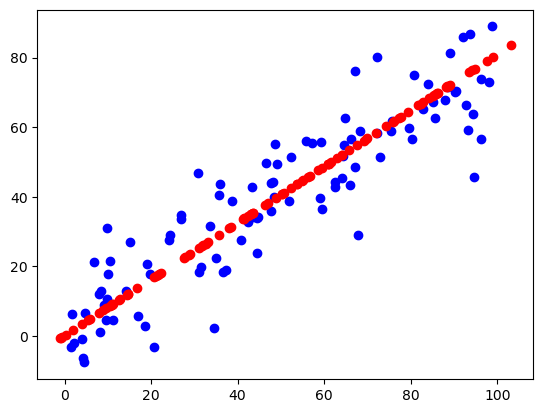

In [24]:
plt.scatter(x[:,0],x[:,1],color = 'b')
plt.scatter(x_restore[:,0],x_restore[:,1],color = 'r')
plt.show()